In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
#read data
df2015 = pd.read_csv("/kaggle/input/world-happiness/2015.csv")
df2016 = pd.read_csv("/kaggle/input/world-happiness/2016.csv")
df2017 = pd.read_csv("/kaggle/input/world-happiness/2017.csv")
df2018 = pd.read_csv("/kaggle/input/world-happiness/2018.csv")
df2019 = pd.read_csv("/kaggle/input/world-happiness/2019.csv")

In [3]:
#check the data
datasets = (("2015",df2015),("2016",df2016),("2017",df2017),("2018",df2018),("2019",df2019))
for year,data in datasets:
    print(year,": ",data.shape)

2015 :  (158, 12)
2016 :  (157, 13)
2017 :  (155, 12)
2018 :  (156, 9)
2019 :  (156, 9)


In [4]:
#check missing values
for year, data in datasets:
    print("check NaN in", year, "\n", data.isna().sum())

check NaN in 2015 
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
check NaN in 2016 
 Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64
check NaN in 2017 
 Country                          0
Happ

In [5]:
#find top happiest countries
for year,data in datasets:
    print(year,"\n",data.head)

2015 
 <bound method NDFrame.head of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39

In [6]:
#find correlation to happiness score
def findCorrelation(df):
    scorecol = [col for col in df if "score" in col.lower()]
    hapScore = df[scorecol[0]]
    df=df.dropna(axis='columns')
    df=df.select_dtypes(exclude="object")
    correlationscore = []
    for col in df:
        corrs = hapScore.corr(df[col])
        if corrs < 0.99 and corrs > 0:
            correlationscore.append([col, corrs*100])
    correlationscore = sorted(correlationscore,key=lambda correlationscore:(correlationscore[1]), reverse=True)
    return correlationscore

correlationRanking = []
for year, data in datasets:
    correlationRanked = findCorrelation(data)
    print(year)
    print(*correlationRanked,sep="\n")
    faf = list(map(list, zip(*correlationRanked)))
    correlationRanking.append(faf)
    

2015
['Economy (GDP per Capita)', 78.09655268660211]
['Family', 74.06051972367848]
['Health (Life Expectancy)', 72.41995951050694]
['Freedom', 56.821090419251796]
['Dystopia Residual', 53.04735177821585]
['Trust (Government Corruption)', 39.5198583836911]
['Generosity', 18.031852669717427]
2016
['Economy (GDP per Capita)', 79.03220167261063]
['Health (Life Expectancy)', 76.5384334433668]
['Family', 73.92515774070019]
['Freedom', 56.68266730968935]
['Dystopia Residual', 54.37376142982474]
['Trust (Government Corruption)', 40.203224514729264]
['Generosity', 15.684779640360794]
2017
['Economy..GDP.per.Capita.', 81.24687538866412]
['Health..Life.Expectancy.', 78.19506247990084]
['Family', 75.27366726961485]
['Freedom', 57.0137193597507]
['Dystopia.Residual', 47.53551243132995]
['Trust..Government.Corruption.', 42.90797372221718]
['Generosity', 15.525583911274463]
2018
['GDP per capita', 80.21239467301908]
['Healthy life expectancy', 77.58136033302463]
['Social support', 74.57601649725754]


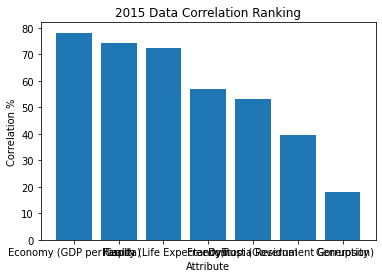

['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Dystopia Residual', 'Trust (Government Corruption)', 'Generosity']


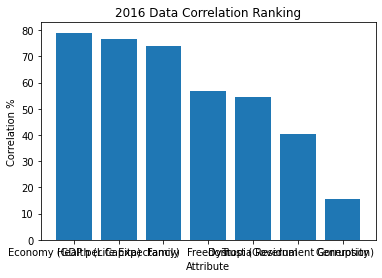

['Economy (GDP per Capita)', 'Health (Life Expectancy)', 'Family', 'Freedom', 'Dystopia Residual', 'Trust (Government Corruption)', 'Generosity']


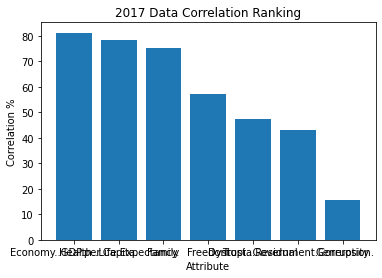

['Economy..GDP.per.Capita.', 'Health..Life.Expectancy.', 'Family', 'Freedom', 'Dystopia.Residual', 'Trust..Government.Corruption.', 'Generosity']


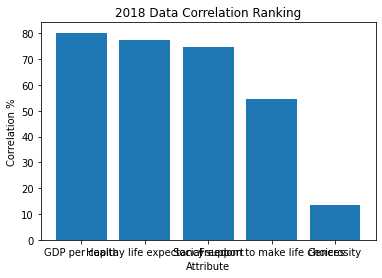

['GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Generosity']


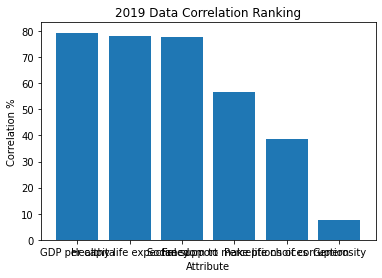

['GDP per capita', 'Healthy life expectancy', 'Social support', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']


In [7]:
#visualize correlation rank
import matplotlib.pyplot as plt

year = 2015
for data in correlationRanking:
    plt.bar(data[0],data[1])
    plt.title(str(year)+' Data Correlation Ranking')
    plt.xlabel('Attribute')
    plt.ylabel('Correlation %')
    plt.show()
    print(data[0])
    year += 1

In [8]:
#find top happiest countries
